# Battle of Neighborhoods

# Scarborough, Canada

## Check Average Prices and School Ratings 

**The Location:**
Scarborough is a popular destination for new immigrants in Canada to reside. As a result, it is one of the most diverse and multicultural areas in the Greater Toronto Area, being home to various religious groups and places of worship.


**Project Description:**
The projects aim to create an  analysis of features for a neighborhood or a comparative analysis between neighborhoods with just sending out the names of the neighborhoods. The features include like population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities. This would help people to get awareness of the places before moving to a new country, state, city or place for their work or to start a new life

This Project would help users take a better decision on choosing the best neighborhood out of many neighborhoods to move into NewYork city based on the distribution of various facilities in and around that neighborhood. 

### 1. Python packages and Dependencies

In [1]:
import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import warnings
warnings.filterwarnings("ignore")

### 2. Import Data

In [2]:
df=pd.read_csv('data1.csv')
print(df.shape)
df.head(5)

(103, 7)


,Unnamed: 0,Unnamed: 0.1,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,0,0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517
1,1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750
2,2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256
3,3,3,M1G,Scarborough,Woburn,43.768359,-79.217590
4,4,4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440


In [3]:
df = df[df['Borough']=='Scarborough']

In [4]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Seattle,Washington are 43.773077, -79.257774.


### 3. Map Scarborough Canada

In [5]:
# create map of Toronto using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [6]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 43.773077, -79.257774.


In [7]:
# @hiddel_cell
CLIENT_ID = 'BBQXB32PGM34R1JNSOPSEGYXQ30RNRDISVLAFQEHEFHLDKWT'
CLIENT_SECRET = 'N3JPITAGOZFHL5WSRIAQ3AZLQNOM52JSO2QJMPKHIS2IOTGW'
VERSION ='20120609'

In [8]:
import requests
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [9]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.beenHere.count',
       'venue.beenHere.lastCheckinExpiredAt', 'venue.beenHere.marked',
       'venue.beenHere.unconfirmedCount', 'venue.categories',
       'venue.events.count', 'venue.events.summary', 'venue.hereNow.count',
       'venue.hereNow.groups', 'venue.hereNow.summary', 'venue.id',
       'venue.location.address', 'venue.location.cc', 'venue.location.city',
       'venue.location.country', 'venue.location.crossStreet',
       'venue.location.distance', 'venue.location.formattedAddress',
       'venue.location.labeledLatLngs', 'venue.location.lat',
       'venue.location.lng', 'venue.location.neighborhood',
       'venue.location.postalCode', 'venue.location.state', 'venue.name',
       'venue.photos.count', 'venue.photos.groups',
       'venue.stats.checkinsCount', 'venue.stats.tipCount',
       'venue.stats.usersCount', 'venue.stats.visitsCount',
       'venue.venuePage.id', 'venue.verified'],
      dtype='object

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues

In [11]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(5)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775908,-79.258352
2,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
3,Canyon Creek Chophouse,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",43.776959,-79.261694
4,Tommy Hilfiger Company Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776015,-79.257369


### 5. Categories of Nearby Venues

In [12]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,American Eagle Outfitters,Clothing Store,43.775908,-79.258352
2,SEPHORA,Cosmetics Shop,43.775017,-79.258109
3,Canyon Creek Chophouse,Steakhouse,43.776959,-79.261694
4,Tommy Hilfiger Company Store,Clothing Store,43.776015,-79.257369


In [13]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store         6
Coffee Shop            5
Restaurant             3
Sporting Goods Shop    3
Pharmacy               2
Italian Restaurant     2
Sandwich Place         2
Wings Joint            2
Cosmetics Shop         2
Grocery Store          2
Name: categories, dtype: int64

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [16]:
print('There are {} uniques categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 76 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,33,33,33,33,33,33
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",4,4,4,4,4,4
"Birch Cliff, Cliffside West",9,9,9,9,9,9
Cedarbrae,8,8,8,8,8,8
"Clairlea, Golden Mile, Oakridge",18,18,18,18,18,18


### One Hot Encoding of Features

In [17]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Big Box Store,Bistro,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Hobby Shop,Hookah Bar,Indian Restaurant,Intersection,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Motorcycle Shop,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool,Print Shop,Restaurant,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Skating Rink,Soccer Field,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Train Station,Video Game Store,Vietnamese Restaurant,Zoo Exhibit
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                 venue  freq
0   Chinese Restaurant  0.12
1        Shopping Mall  0.12
2       Sandwich Place  0.03
3  American Restaurant  0.03
4                 Park  0.03


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  venue  freq
0              Pharmacy  0.50
1        Sandwich Place  0.25
2      Sushi Restaurant  0.25
3      Malay Restaurant  0.00
4  Other Great Outdoors  0.00


----Birch Cliff, Cliffside West----
             venue  freq
0             Park  0.33
1     Skating Rink  0.11
2             Café  0.11
3              Gym  0.11
4  College Stadium  0.11


----Cedarbrae----
                  venue  freq
0      Hakka Restaurant  0.12
1    Athletics & Sports  0.12
2  Caribbean Restaurant  0.12
3                Bakery  0.12
4                  Bank  0.12


----Clairlea, Golden Mile, Oakridge----
          venue  freq
0   Coffee Shop  0.11
1         Diner  0.11
2  Intersection  0.11
3        Bakery  0.11
4      Bus Line  0.11

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near neighborhood

In [20]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Print Shop,Grocery Store,Coffee Shop,Vietnamese Restaurant,Malay Restaurant,Mediterranean Restaurant,Breakfast Spot,Motorcycle Shop
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Pharmacy,Sushi Restaurant,Sandwich Place,Zoo Exhibit,Cosmetics Shop,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping
2,"Birch Cliff, Cliffside West",Park,Skating Rink,Gym,Gym Pool,College Stadium,Café,General Entertainment,Bakery,Coffee Shop,Fried Chicken Joint
3,Cedarbrae,Hakka Restaurant,Athletics & Sports,Indian Restaurant,Bank,Bakery,Caribbean Restaurant,Thai Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant
4,"Clairlea, Golden Mile, Oakridge",Diner,Coffee Shop,Intersection,Bus Line,Bakery,Park,Bus Station,Convenience Store,Metro Station,Soccer Field


### k-means Clustering

In [21]:
# set number of clusters
# Using k-means to cluster the neighborhood into 3 clusters.

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
#Scarborough_grouped_clustering = Scarborough_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0], dtype=int32)

In [22]:
Scarborough_merged =df.iloc[:16,:]

# add clustering labels
Scarborough_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head()# check the last columns!

,Unnamed: 0,Unnamed: 0.1,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517,0,Construction & Landscaping,Zoo Exhibit,Fast Food Restaurant,Department Store,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Cosmetics Shop,Deli / Bodega
1,1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750,0,Bar,Diner,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Zoo Exhibit
2,2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256,0,Athletics & Sports,Gym,Gym / Fitness Center,Park,Zoo Exhibit,Deli / Bodega,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping
3,3,3,M1G,Scarborough,Woburn,43.768359,-79.217590,0,Coffee Shop,Business Service,Fast Food Restaurant,Park,Zoo Exhibit,Cosmetics Shop,Chinese Restaurant,College Stadium,Construction & Landscaping,Convenience Store
4,4,4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440,0,Hakka Restaurant,Athletics & Sports,Indian Restaurant,Bank,Bakery,Caribbean Restaurant,Thai Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant


### Map of Clusters

In [24]:
# create map
kclusters = 3
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [25]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [31]:
print(Scarborough_merged.columns)
print(df1.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Postalcode', 'Borough', 'Neighborhood',
       'Latitude', 'Longitude', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')
Index(['Postalcode', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')


### Average Housing Prices

In [26]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0]})

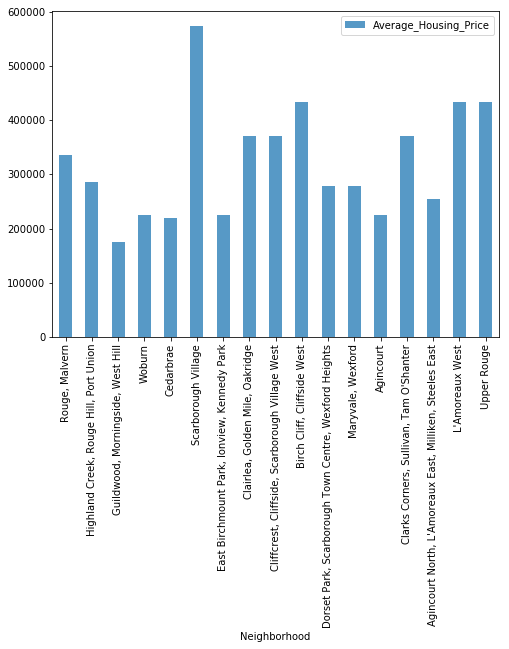

In [27]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75)

### School Rating by Clusters

In [28]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

KeyError: 'Neighborhood'

In [ ]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,]})

In [ ]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

Scarborough_school_ratings.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

#### Conclusion:
In this project, through a k-means cluster algorithm we separate the neighborhood into 03 clusters, which have similar neighborhoods around them. Using the charts above decision loving to a particular neighborhood based on average house prices and school rating can be made